In [4]:
#importing librarius
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
#reading dataset
cars=pd.read_csv('/content/cars.csv')
cars.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
cars.head()

,Mark,Model,Year,Body_type,Color,Capacity,HorsePowers,EngineType,Transmission,Mileage,Is_new,Price,Price_currency,Link
0,Chevrolet,Cobalt,2022,Sedan,Ağ,1.5,106,Benzin,Avtomat,0,Bəli,23000,AZN,https://turbo.az//autos/6563353-chevrolet-cobalt
1,Toyota,Prado,2008,Offroader / SUV,Ağ,2.7,163,Benzin,Avtomat,137500,Xeyr,37000,AZN,https://turbo.az//autos/7242557-toyota-prado
2,Mercedes,S 560 4Matic,2017,Sedan,Qara,4.0,469,Benzin,Avtomat,49000,Xeyr,89777,USD,https://turbo.az//autos/7397776-mercedes-s-560...
3,Kia,Sorento,2020,Offroader / SUV,Mavi,1.6,230,Hibrid,Avtomat,22000,Xeyr,38500,USD,https://turbo.az//autos/7358108-kia-sorento
4,Mercedes,CLA 45 S AMG,2016,Sedan,Qara,2.0,381,Benzin,Avtomat,91000,Xeyr,37000,USD,https://turbo.az//autos/7224943-mercedes-cla-4...


In [7]:
#analyzing
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mark            14940 non-null  object 
 1   Model           14940 non-null  object 
 2   Year            14940 non-null  int64  
 3   Body_type       14940 non-null  object 
 4   Color           14940 non-null  object 
 5   Capacity        14940 non-null  float64
 6   HorsePowers     14940 non-null  int64  
 7   EngineType      14940 non-null  object 
 8   Transmission    14940 non-null  object 
 9   Mileage         14940 non-null  int64  
 10  Is_new          14940 non-null  object 
 11  Price           14940 non-null  int64  
 12  Price_currency  14940 non-null  object 
 13  Link            14940 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.6+ MB


In [8]:
#analyzing
cars.describe()

,Year,Capacity,HorsePowers,Mileage,Price
count,14940.000000,14940.000000,14940.000000,1.494000e+04,14940.000000
mean,2011.630254,2.332684,193.181660,1.568781e+05,33052.621084
std,8.194591,1.352645,105.859817,1.400455e+05,37828.279130
min,1938.000000,0.000000,3.000000,0.000000e+00,530.000000
25%,2007.000000,1.600000,115.000000,5.200000e+04,14200.000000
50%,2013.000000,2.000000,170.000000,1.460000e+05,23900.000000
75%,2017.000000,2.500000,245.000000,2.210000e+05,37900.000000
max,2023.000000,15.000000,761.000000,2.000000e+06,850000.000000


Text(0, 0.5, 'amount')

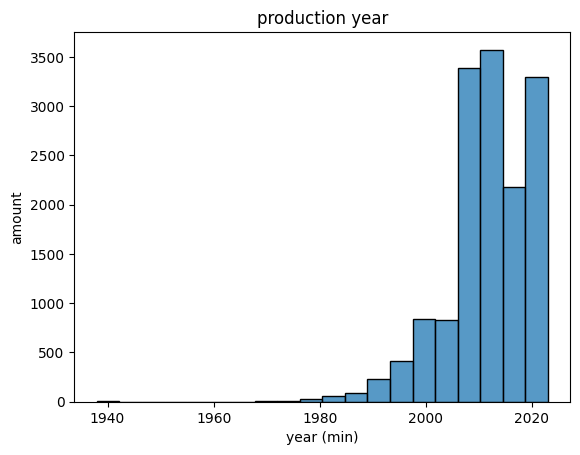

In [9]:
#production year distribution
sns.histplot(cars['Year'], bins = 20)
plt.title('production year')
plt.xlabel('year (min)')
plt.ylabel('amount')

Text(0, 0.5, 'amount')

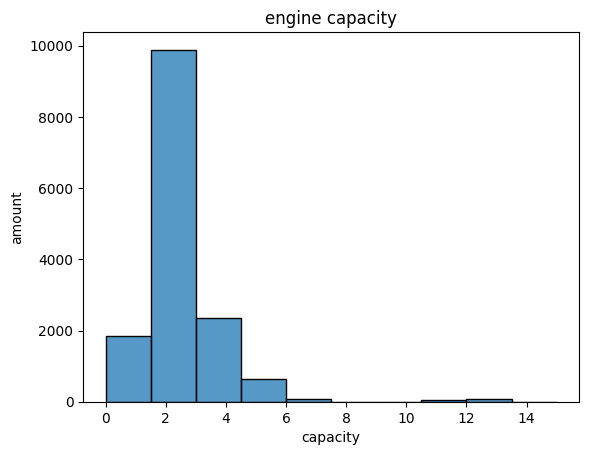

In [10]:
#engine capacity distribution
sns.histplot(data = cars, x = 'Capacity', bins = 10)
plt.title('engine capacity')
plt.xlabel('capacity')
plt.ylabel('amount')

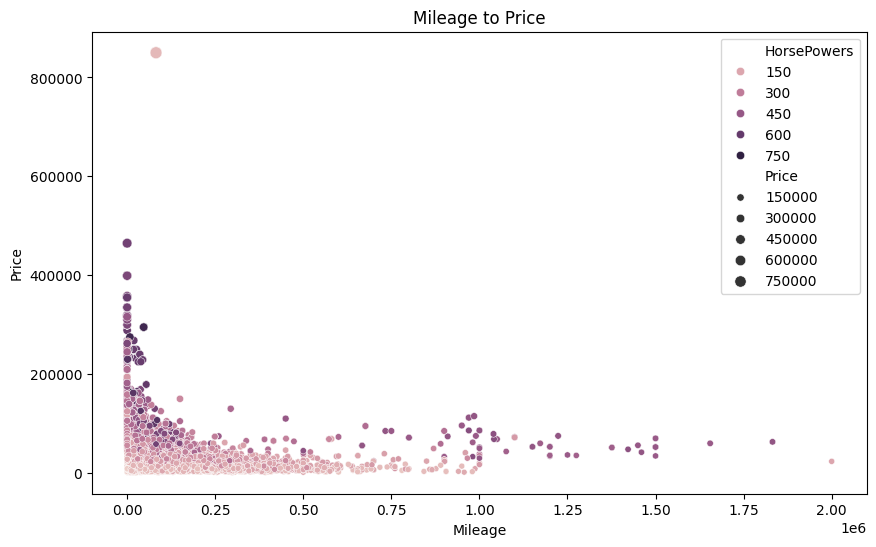

In [11]:
#mileage to price distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data = cars, x = 'Mileage', y = 'Price', hue = 'HorsePowers', size = 'Price')
plt.title('Mileage to Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'amount')

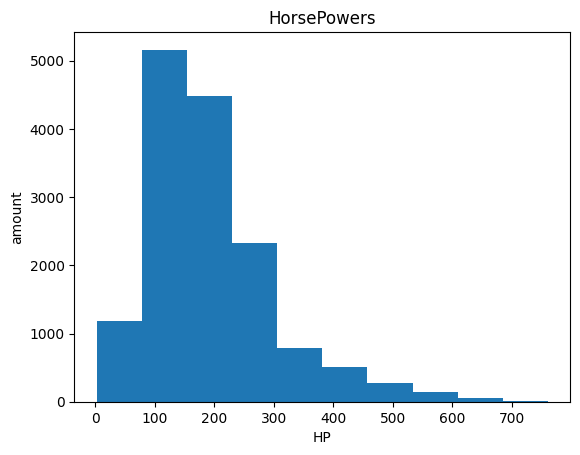

In [12]:
#HP distribution
plt.hist(cars['HorsePowers'])
plt.title('HorsePowers')
plt.xlabel('HP')
plt.ylabel('amount')

Text(0, 0.5, 'amount')

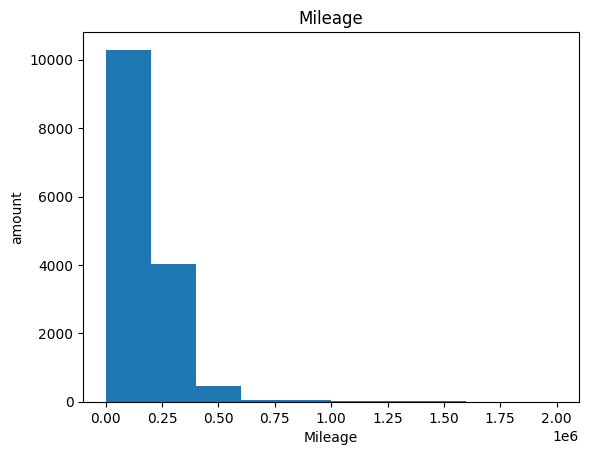

In [13]:
#mileage distribution
plt.hist(cars['Mileage'])
plt.title('Mileage')
plt.xlabel('Mileage')
plt.ylabel('amount')

Text(0, 0.5, 'amount')

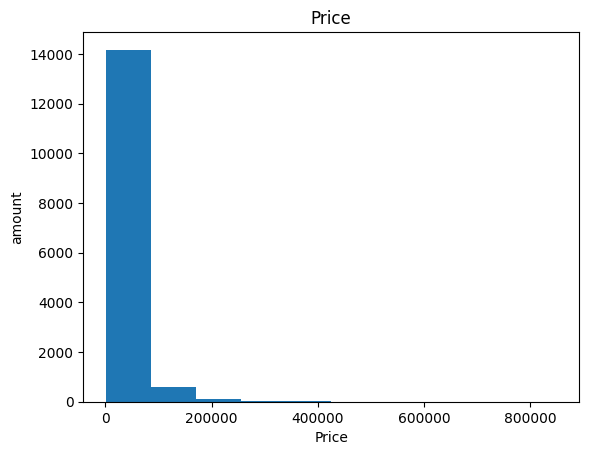

In [14]:
#price
plt.hist(cars['Price'])
plt.title('Price')
plt.xlabel('Price')
plt.ylabel('amount')

In [15]:
#checking unique models
unique_cars = cars.value_counts(['Mark', 'Model'])
unique_cars

,,count
Mark,Model,
Kia,Sorento,496
Hyundai,Santa Fe,483
Opel,Astra,387
Land Rover,Range Rover,366
Toyota,Prius,360
...,...,...
Jonway,YY50QT-21B,1
Nissan,Almera,1
Nama,48-2,1


In [16]:
unique_cars.info()

<class 'pandas.core.series.Series'>
MultiIndex: 985 entries, ('Kia', 'Sorento') to ('ATV', '150')
Series name: count
Non-Null Count  Dtype
--------------  -----
985 non-null    int64
dtypes: int64(1)
memory usage: 23.3+ KB


In [17]:
#all models counting
cars.value_counts('Mark')

,count
Mark,
Mercedes,2280
Toyota,1646
Hyundai,1641
Kia,1404
BMW,1082
...,...
Benelli,1
Bajaj,1
BMW Alpina,1


In [18]:
#all marks counting
cars.value_counts('Model')

,count
Model,
Sorento,496
Santa Fe,483
Astra,387
Range Rover,366
Prius,360
...,...
CLS 400,1
CLS 250 CDI,1
Labo,1


<Axes: xlabel='Mark'>

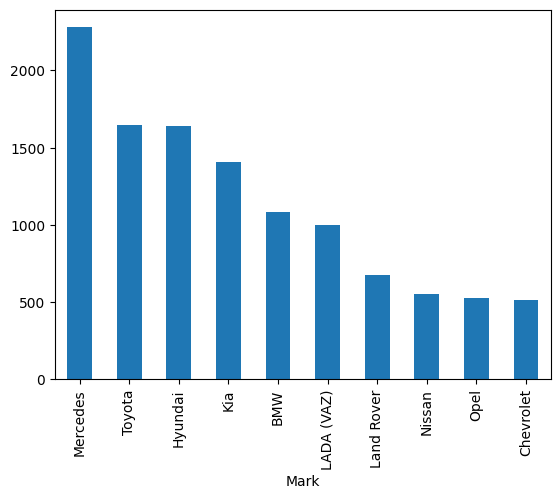

In [19]:
#top 10 marks
top10_marks = (cars['Mark'].value_counts()).iloc[:10]
top10_marks.plot(kind='bar')

<Axes: xlabel='Model'>

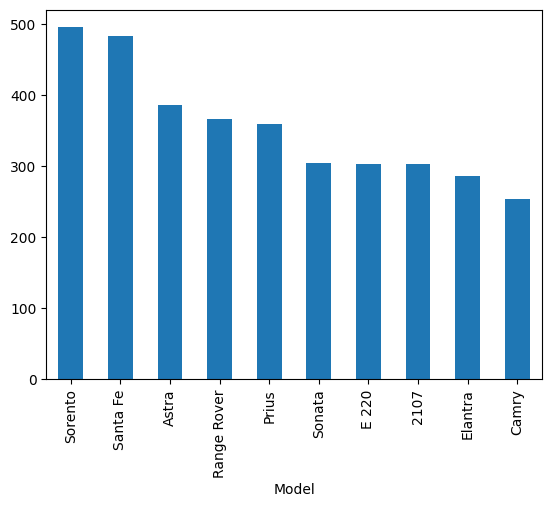

In [20]:
#top 10 models
top10_models = (cars['Model'].value_counts()).iloc[:10]
top10_models.plot(kind='bar')

In [21]:
top10_marks

,count
Mark,
Mercedes,2280
Toyota,1646
Hyundai,1641
Kia,1404
BMW,1082
LADA (VAZ),997
Land Rover,678
Nissan,555
Opel,528


In [22]:
top_10_cars = cars['Mark'].value_counts()[:10]
top_10_cars.index
top_10_cars.values

array([2280, 1646, 1641, 1404, 1082,  997,  678,  555,  528,  510])

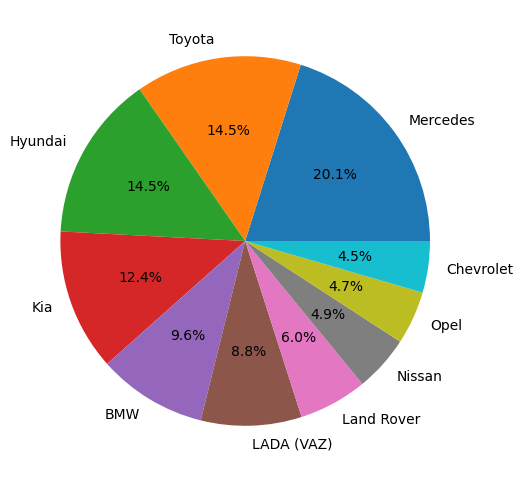

In [23]:
#here is a pie plot showing top 10 marks distribution
plt.figure(figsize = (8,6))
plt.pie(x = top_10_cars.values, labels = top_10_cars.index, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Year', ylabel='Price'>

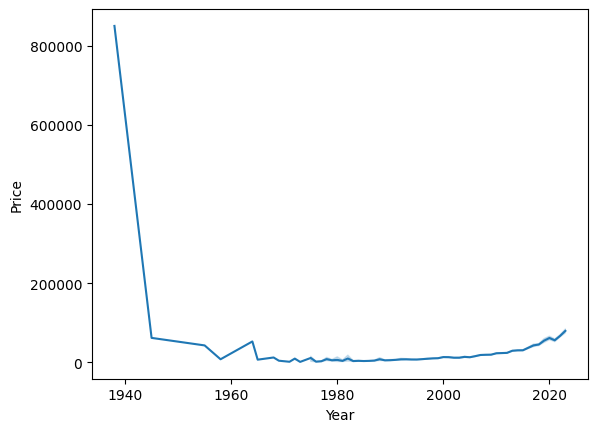

In [24]:
#visualizing year vs price
sns.lineplot(data = cars, x = 'Year', y = 'Price')

In [25]:
#top10_car_marks = ['Mercedes', 'Toyota','Hyundai', 'Kia', 'BMW', 'LADA (VAZ)', 'Land Rover', 'Nissan', 'Opel', 'Chevrolet']
top10_car_marks = cars['Mark'].value_counts()[:10]

In [26]:
#To optimize resources and time, I would build the model using only top 10 car marks info
top10_car_marks = top10_car_marks.index

In [27]:
#Cleande dataset with top 10 msrks info
cars_cleaned = cars[cars['Mark'].isin(top10_car_marks)]

In [28]:
#some translation work
df = cars_cleaned[cars_cleaned['Is_new']== 'Xeyr']

In [29]:
df.isna().sum()

,0
Mark,0
Model,0
Year,0
Body_type,0
Color,0
Capacity,0
HorsePowers,0
EngineType,0
Transmission,0
Mileage,0


In [30]:
df.shape

(10460, 14)

In [31]:
#cleaning outliers
def clean_outliers(col, df):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  outliers = df[col].loc[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
  print(f"Number of {col} outliers: {len(outliers)}")
  df = df.loc[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]
  return df

In [32]:
numeric_cols = df.select_dtypes(include = ['number']).columns.tolist()

In [33]:
for col in numeric_cols:
  df = clean_outliers(col, df)

Number of Year outliers: 401
Number of Capacity outliers: 818
Number of HorsePowers outliers: 424
Number of Mileage outliers: 184
Number of Price outliers: 321


In [34]:
df.isna().sum()

,0
Mark,0
Model,0
Year,0
Body_type,0
Color,0
Capacity,0
HorsePowers,0
EngineType,0
Transmission,0
Mileage,0


In [35]:
df['Price_currency'].value_counts()

,count
Price_currency,
AZN,6909
USD,1403


In [36]:
#price convertation into USD (exchange rate can be changed)
def change_currency(df):
  usd_azn = 1.7
  eur_usd = 1.08

  df.loc[df['Price_currency'] == 'AZN', 'Price'] /= usd_azn
  df.loc[df['Price_currency'] == 'EUR', 'Price'] *= eur_usd
  return df

In [37]:
df = change_currency(df)

In [38]:
#scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])
df[numeric_cols] = scaled_data

In [39]:
df.isna().sum()

,0
Mark,0
Model,0
Year,0
Body_type,0
Color,0
Capacity,0
HorsePowers,0
EngineType,0
Transmission,0
Mileage,0


In [40]:
df.columns

Index(['Mark', 'Model', 'Year', 'Body_type', 'Color', 'Capacity',
       'HorsePowers', 'EngineType', 'Transmission', 'Mileage', 'Is_new',
       'Price', 'Price_currency', 'Link'],
      dtype='object')

In [41]:
#dropping non-neccesary columns...and yes - prediction models will be for used cars
df.drop(['Price_currency', 'Link', 'Is_new'], axis = 1, inplace = True)

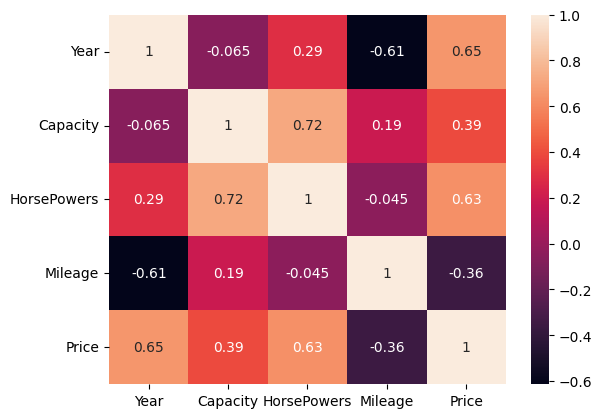

In [42]:
# feature correlations heatmap
sns.heatmap(df.corr(numeric_only= True), annot = True)
plt.show()

In [43]:
#categorical columns to list for the encoder
categorical_cols = ['Mark', 'Model', 'Body_type', 'Color', 'EngineType', 'Transmission']


In [44]:
#encodeing categorical data to make it suitable for the regression model
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df_encoded.index = df.index
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, df_encoded], axis=1)

In [45]:
#checking if the encoder has the job done
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [46]:
categorical_cols

['Mark', 'Model', 'Body_type', 'Color', 'EngineType', 'Transmission']

In [47]:
df.head()

,Year,Capacity,HorsePowers,Mileage,Price,Mark_BMW,Mark_Chevrolet,Mark_Hyundai,Mark_Kia,Mark_LADA (VAZ),...,Color_Çəhrayı,EngineType_Benzin,EngineType_Dizel,EngineType_Hibrid,EngineType_Plug-in Hibrid,EngineType_Qaz,Transmission_Avtomat,Transmission_Mexaniki,Transmission_Robotlaşdırılmış,Transmission_Variator
1,0.464286,0.633333,0.468750,0.313279,0.407038,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.892857,0.266667,0.701389,0.049895,0.740762,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.857143,0.266667,0.281250,0.364587,0.276833,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.607143,0.400000,0.753472,0.303017,0.275660,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.714286,0.400000,0.753472,0.255129,0.312023,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
df.isna().sum()

,0
Year,0
Capacity,0
HorsePowers,0
Mileage,0
Price,0
...,...
EngineType_Qaz,0
Transmission_Avtomat,0
Transmission_Mexaniki,0
Transmission_Robotlaşdırılmış,0


In [49]:
#deviding data to features - X and target - y
X = df.drop('Price', axis = 1)
y = df['Price']

In [50]:
df.shape

(8312, 327)

In [51]:
#using train test split to split the data into training and test selections
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 145, shuffle = True)

In [ ]:
#as a first model lets use a random forest with a grid search to find out best parameters
rf = RandomForestRegressor()

In [ ]:
parameters = {
    'n_estimators' : [180, 200, 220],
    'max_depth' : [20, 25, 30]
}

In [ ]:
gsearch = GridSearchCV(rf, parameters)

In [ ]:
gsearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [180, 200, 220]})

In [ ]:
#here are the best parameters
best_model = gsearch.best_estimator_
gsearch.best_params_

{'max_depth': 30, 'n_estimators': 180}

In [ ]:
#evaluating the score
y_pred = gsearch.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('R2', r2)
print('MSE', mse)
print('MAPE', mape)

R2 0.9579738066395974
MSE 0.001443047397228825
MAPE 0.11154454382740861


In [52]:
#using XGBRegressor secondly and doind the same thing with the grid search
xgb = XGBRegressor()

In [53]:
parameters = {
     'n_estimators' : [50, 100, 120, 150],
    'max_depth' : [10, 15, 20],
    'learning_rate' : [0.001, 0.005, 0.01, 0.02],
    'booster' : ['gbtree', 'gblinear']
}

In [54]:
grsearch = GridSearchCV(xgb, parameters)
grsearch.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.001, 0.005, 0.01, 0.02],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [50, 100, 120, 150]})

In [55]:
best_model = grsearch.best_estimator_
grsearch.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.02,
 'max_depth': 10,
 'n_estimators': 150}

In [56]:
y_pred = grsearch.predict(X_test)

In [57]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('R2', r2)
print('MSE', mse)
print('MAPE', mape)

R2 0.9531268319179661
MSE 0.0016094772757691514
MAPE 0.14935156633009639


In [58]:
#lets check how KNeighbours will work as a third model
knn = KNeighborsRegressor()

In [59]:
parameters = {
     'n_neighbors' : [5, 10, 15, 20],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [30, 35, 40, 50]
}

In [60]:
gridsearch = GridSearchCV(knn, parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 40, 50],
                         'n_neighbors': [5, 10, 15, 20]})

In [61]:
best_model = gridsearch.best_estimator_
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 40, 'n_neighbors': 5}

In [62]:
y_pred = gridsearch.predict(X_test)

In [63]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('R2', r2)
print('MSE', mse)
print('MAPE', mape)

R2 0.8849387176127456
MSE 0.003950842814785639
MAPE 0.18271852549088363


In [64]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 0.06285573016667326


In [ ]:
#ALL MODELS RESULTS:

#Random Forest Regressor values:
#R2 0.9579738066395974
#MSE 0.001443047397228825
#MAPE 0.11154454382740861

#XGB Regressor values:
#R2 0.9531268319179661
#MSE 0.0016094772757691514
#MAPE 0.14935156633009639

#KN Neighbors values:
#R2 0.8849387176127456
#MSE 0.003950842814785639
#MAPE 0.18271852549088363
#RMSE: 0.06285573016667326